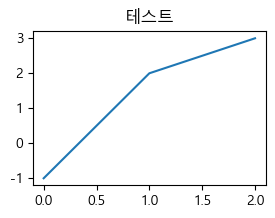

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ---------------------------------------
# 한글 폰트 설정
# ---------------------------------------

plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

pd.Series([-1,2,3]).plot(title='테스트', figsize=(3,2))

# ---------------------------------------
# 그래프 전역 크기 설정
# ---------------------------------------
plt.rc('figure', figsize=(12,5))

pass


## 데이터 수집

- 시간대별 산불현황 데이터
    - https://kosis.kr/statHtml/statHtml.do?sso=ok&returnurl=https%3A%2F%2Fkosis.kr%3A443%2FstatHtml%2FstatHtml.do%3Fconn_path%3DMT_ZTITLE%26list_id%3DC_12%26obj_var_id%3D%26seqNo%3D%26tblId%3DTX_13625_A007%26vw_cd%3DMT_ZTITLE%26itm_id%3D%26language%3Dkor%26lang_mode%3Dko%26orgId%3D136%26

## 시간대별 산불 발생 현황

In [2]:
# ----------------------------------
# 컬러 지정
# ----------------------------------

time_colors = {
    '오전(6~10시)': '#A3D9FF',   
    '정오(11~13시)': '#FFD966',   
    '오후(14~18시)': '#FF9F68',   
    '야간(19~05시)': '#3B3B98'    
}

In [3]:
# ----------------------------------
# 데이터프레임 생성
# ----------------------------------

df_time = pd.read_csv("C:\\Users\\User\\Documents\\VSCode\\Data School\\data school\\00.data\\산불데이터\\시간대별_산불발생_현황_20250416093327.csv")

In [4]:
# ----------------------------------
# 인덱스라벨 설정
#   - 시점
# ----------------------------------

df_time.set_index('시점', inplace=True)
df_time.drop(columns=['기간별(1)', '합계'], inplace=True)

In [5]:
# ----------------------------------
# 시간별 평균 산불 팔생 현황 집계
# ----------------------------------

df_time.mean()

오전(6~10시)      33.607143
정오(11~13시)    162.392857
오후(14~18시)    223.964286
야간(19~05시)     56.071429
dtype: float64

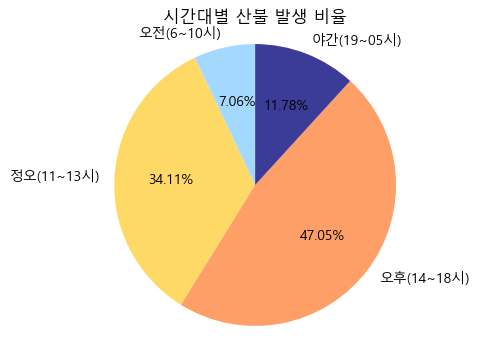

In [6]:
# ----------------------------------
# 시각화
# ----------------------------------

colors = [time_colors[col] for col in df_time.columns]

# 평균 계산 후 파이차트
plt.figure(figsize=(4, 4))
plt.pie(
    df_time.mean(),
    labels=df_time.columns,
    autopct='%.2f%%',
    startangle=90,
    colors=colors
)
plt.title('시간대별 산불 발생 비율')
plt.axis('equal')
plt.show()

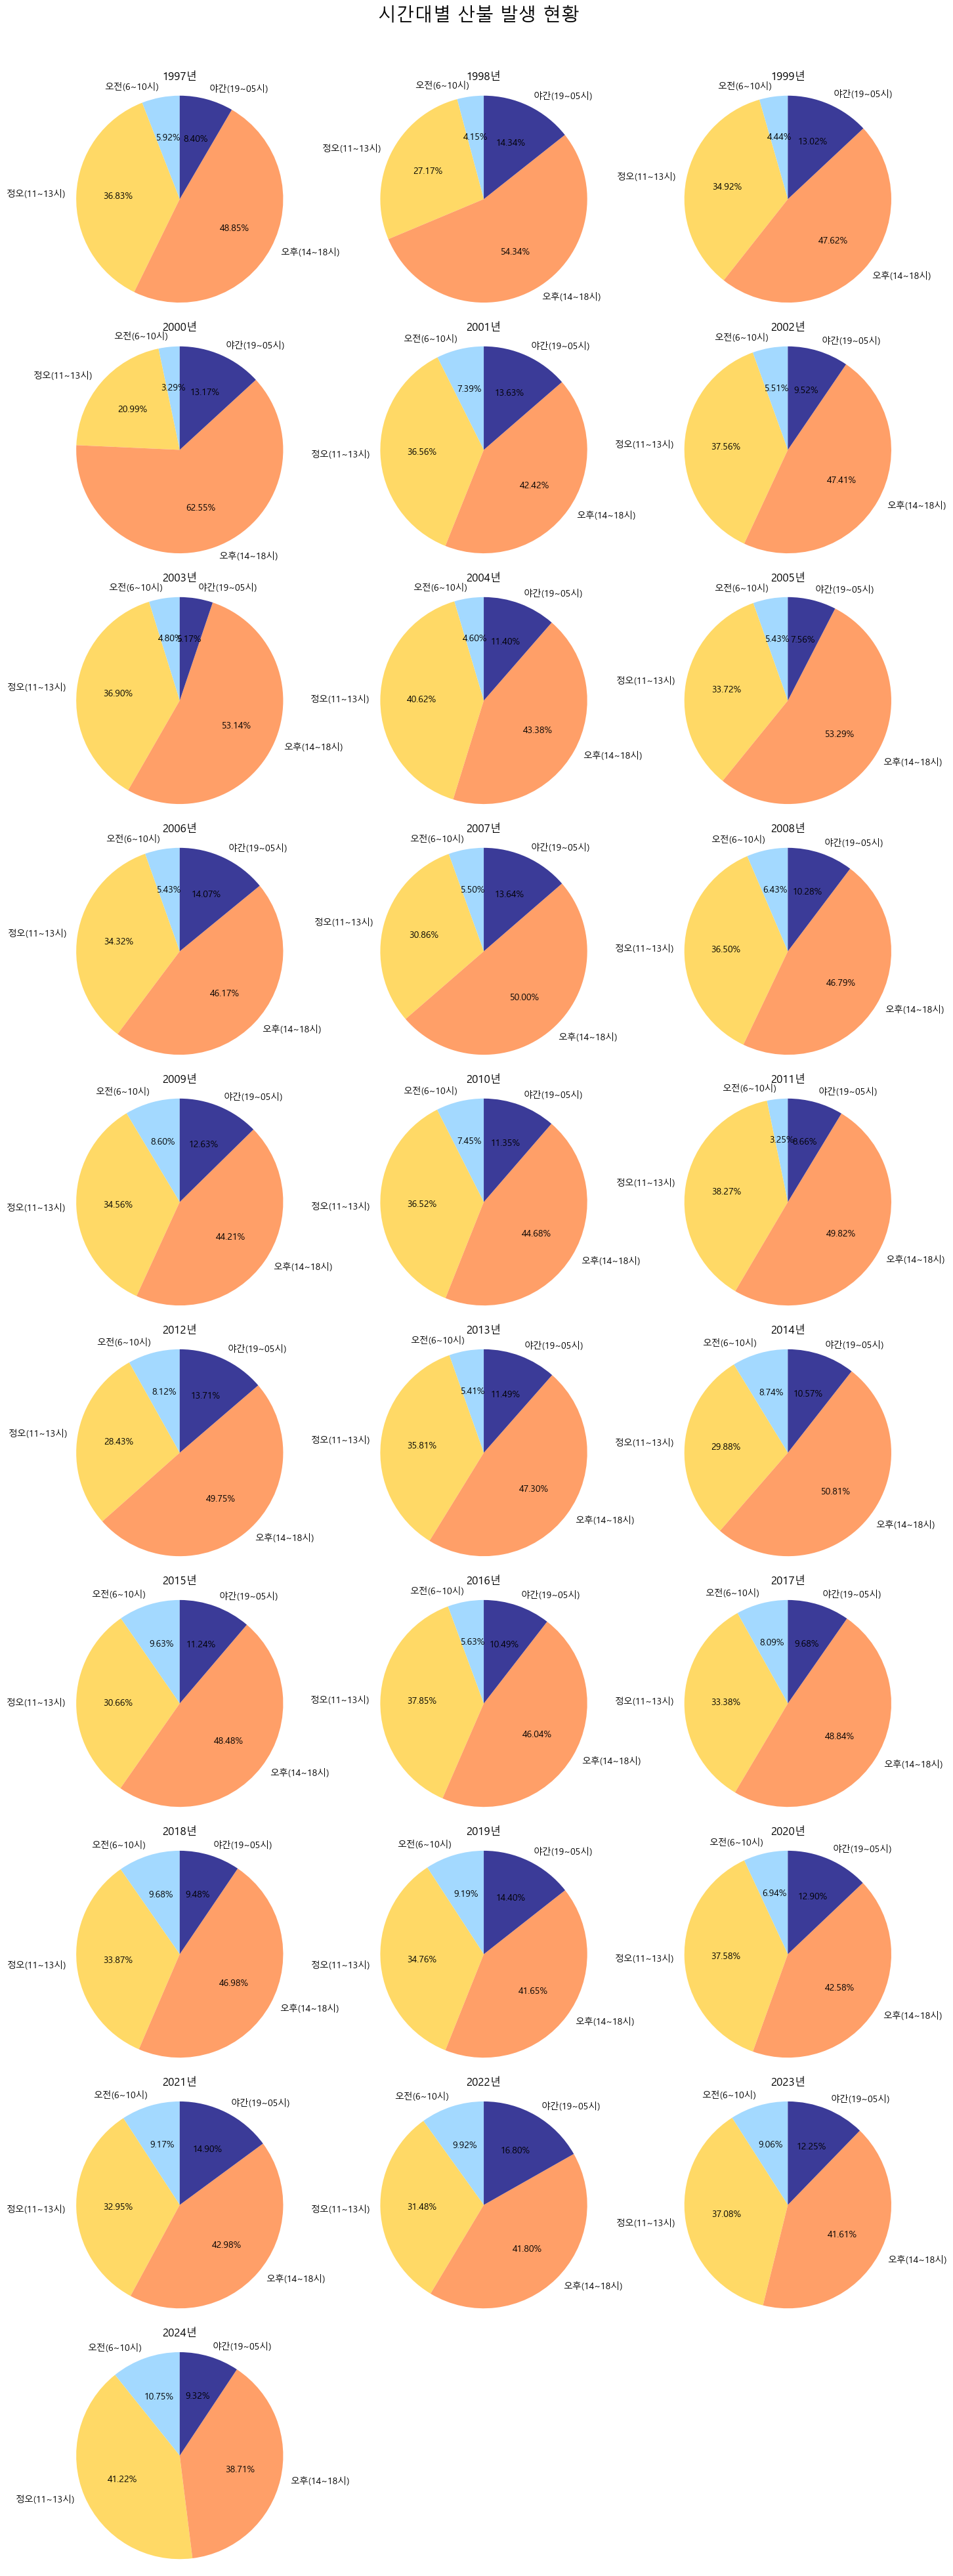

In [7]:
# ----------------------------------
# 연도별 시각화
# ----------------------------------

# 서브플롯 그리기
plt.figure(figsize=(14, 4 * ((len(df_time) + 2) // 3)))

for i, (year, row) in enumerate(df_time.iterrows()):
    plt.subplot((len(df_time) + 2) // 3, 3, i + 1)
    plt.pie(row, labels=row.index, autopct='%.2f%%', startangle=90, colors=colors)
    plt.title(f'{year}년')
    plt.axis('equal')

# 제목 띄우기 (top 값 줄이면 더 위로 올라감)
plt.suptitle('시간대별 산불 발생 현황', fontsize=20)
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()

## **시간대별 산불 발생 분석**

### 전체 평균

- **오후(14~18시)**: **47.05%**
- **정오(11~13시)**: 34.11%
- **야간(19~05시)**: 11.78%
- **오전(6~10시)**: 7.06%

> **오후 시간대에 산불 발생이 가장 많으며**, 정오와 함께 **낮 시간대에 집중**되는 양상이 뚜렷함.

### 연도별 경향

- 대부분의 연도에서 **오후 > 정오 > 야간 > 오전** 순서로 발생 빈도가 나타남.
- **2000년**, **2005년** 등의 경우에는 **오후 산불 비율이 60%를 초과**하는 해도 있음.
- **2012년 이후**는 전반적으로 **야간 및 오전 산불 비중이 소폭 증가**하는 경향도 보임.

> 사람들의 야외 활동이 활발한 시간대(정오~오후)에 산불이 집중되어 있어, **인위적 요인** 가능성도 있음.

## 결론

-  **산불은 '봄철', '낮 시간대'에 집중**됨.
    -  인위적 요인(논·밭두렁 태우기 등)이나 건조한 기후 조건이 주요 원인일 가능성.
-  **봄철 오후 시간대 중심의 예방 정책** 필요:
    - 드론 감시 시간대 집중 운영
    - 오후 등산객 대상 캠페인 강화
    - 봄철 건조주의보 발령 시 강력 통제